## Introduction (cont'd)

In this first lesson we cover topics that will be useful for the rest of the course. So today we will deal with various small arguments, rather than a big one.

### Why Python 
First of all few words on why we are concentrating on $\tt{python}$. 

In short, python is widely used even when it is somehow slower than other languages
because:
* is more productive; it is a very concise and expressive language and requires little time, effort, and lines of code to perform the same operations than with other languages;
* rich set of libraries and frameworks, maintained by a large community of users.

But unfortunately not all that glitters is gold !

Python is a so called interpreted language: it takes some code (a sequence of instructions), reads and executes it. 
This is different from other programming languages like C or C++ which compile code into a language that computers can understand directly (machine language). 

![](compiled_language.png)

As a result, python is essentially an interactive programming language, which means you can program and see the results almost at the same time. This is very nice for a faster development since "compilation" time can be quite long (just to give an idea the compilation of our C++ financial code takes more than one hour). 

However there are drawbacks in term of performance, the translation to machine language has to be done in real-time resulting in slower execution times.

![](machine_language.png)

The first few Chapters of the lecture notes cover the main features and characteristics of this programming language. 


As you probably know $\tt{python}$ is available in various versions (flavours), we are going to use the 3.X. It is not mandatory to use the exact same version,
most of those available in the 3 series should be OK.


## Data Analysis

The very first step of every analysis is data collection. There are many $\tt{python}$ modules to fetch financial data, here we will use $\tt{yfinance}$ which is based on the YahooFinance database. (More details on this module in the lecture notes).

In [2]:
# load MSFT from 2020-01-01 to 2021-08-10
import yfinance as yf

proxy = yf.Ticker('MSFT')
data = proxy.history(start='2020-01-01', end='2021-09-23')

data.tail()

Open        High         Low       Close    Volume  \
Date                                                                   
2021-09-16  303.760010  305.309998  300.760010  305.220001  19550800   
2021-09-17  304.170013  304.500000  299.529999  299.869995  41309300   
2021-09-20  296.329987  298.720001  289.519989  294.299988  38278700   
2021-09-21  295.690002  297.540009  294.070007  294.799988  22364100   
2021-09-22  296.730011  300.220001  294.510010  298.579987  26626300   

            Dividends  Stock Splits  
Date                                 
2021-09-16        0.0             0  
2021-09-17        0.0             0  
2021-09-20        0.0             0  
2021-09-21        0.0             0  
2021-09-22        0.0             0

The $\tt{history}$ method returns a $\tt{pandas}$ dataframe which then can be easily manipulated.

In [3]:
# check info
proxy.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [4]:
# check a specific info
proxy.info['volume']

14998978

Another important aspect of an analysis is data representation. In order to plot data we are going to use the $\tt{matplotlib}$ module. Below a simple example although more details are available in the notes.

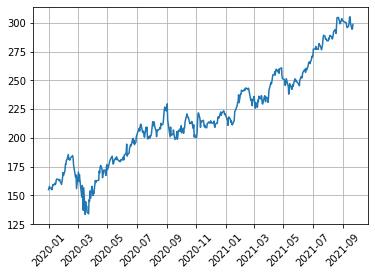

In [8]:
# plot closing price vs index
from matplotlib import pyplot as plt

plt.plot(data['Close'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

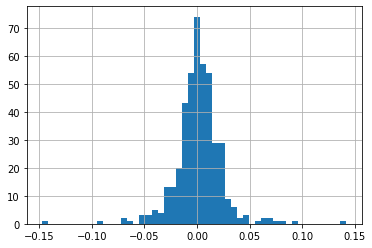

In [13]:
# plot return distro as a histo
data['returns'] = data['Close'].pct_change()

plt.hist(data['returns'], bins=50)
plt.grid(True)
plt.show()

In [15]:
# check mean is coherent
data['returns'].mean()*252

0.4443623898351043

A stock price is a nice example of random variable...

## Random Variable

In probability and statistics a random variable is described as a variable whose values depend on outcomes of a random phenomenon. 

For example, in the event of a coin toss, only two outcomes are possible: heads or tails. If instead the random variable is designated to represent the sum of the resulting numbers after three dice are rolled, it could be 3 (1+1+1), 18 (6+6+6), or somewhere between 3 and 18.

A random variable is required to be measurable, which allows for probabilities to be assigned to sets of its potential values.

A random variable is different from an algebraic variable. The variable in an algebraic equation is an unknown value that can be calculated. The equation $10 + x = 13$ shows that we can calculate the specific value for $x$ which is 3. On the other hand, a random variable has a set of values, and any of those values could be the resulting outcome each of them with a certain probability.

In the corporate world, random variables can be assigned to properties such as the average price of an asset over a given time period, the return on investment after a specified number of years, the estimated turnover rate at a company within the following six months, etc. Risk analysts assign random variables to risk models when they want to estimate the probability of an adverse event occurring.

When the range of possible values for $X$ is un-countably infinite then it is called a continuous random variable and its distribution can be described by a probability density function (PDF). Contrary if the range is countable, the random variable is called a discrete random variable and its distribution can be interpreted as a discrete probability distribution.

![pippo](pdf_pmf.png)

In [16]:
# check norm pdf @ 0
from scipy.stats import norm

norm.pdf(0)

0.3989422804014327

The probability density function is non-negative everywhere, and its integral over the entire space is equal to 1. 

## CDF and Quantiles

The cumulative distribution function (CDF) $F$ of a random variable $X$ (with PDF $f(x)$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$

$$F_X(x) = Pr(X\leq x) = \int_{-\infty}^{x} f(x)dx$$

$$Pr(a \leq X\leq b) = \int_{a}^{b} f(x)dx$$

The quantile function $Q$, associated with a probability distribution of a random variable, specifies the value $x$ of the random variable such that the probability $p$ of the variable being less than or equal to that value equals the given probability. It is also called the percent-point function (PPF) or inverse cumulative distribution.

In terms of the cumulative distribution function $F$, the quantile function $Q$ returns the value $x_p$ such that

$$F_X(x_p) = P(X \leq x_p) = p$$

So the quantile function does the "inverse" of the cumulative distribution function: given a
probability $p$ (or a value of the CDF) it returns the $x$ at which the CDF reaches this probability.

![pippo](percentile.png)

In [20]:
# compute quantile at 0.3 and cdf at result
from scipy.stats import norm

print (norm.cdf(-0.5244005127080409))
print (norm.ppf(0.3))

0.29999999999999993
-0.5244005127080409


If instead of a distribution you have a dataset the quantile can be determined using the
function $\tt{numpy.percentile}$ (this will be useful when estimating VaR). Notice that in this case we are talking about percentile which is the quantile times 100 (e.g. 50-percentile is equivalent to the 0.5-quantile)

In [21]:
# compute two percentiles of a list
import numpy as np
a = [1,2,3,4,5,6,7,8,9]

np.percentile(a, [1, 50])

array([1.08, 5.  ])

### Expected Value

The outcomes of a random variable $X$ are connected to probabilities, hence in order to evaluate $X$ all the possibilities need to be taken into account. This is done with the \emph{expected value} which is a generalization of the weighted average, and is intuitively the arithmetic mean of a large number of independent realizations of $X$.

#### Discrete Case
Let $X$ be a random variable with a finite number of finite outcomes ($x_1, x_2, \ldots , x_k$) occurring with probabilities ($p_1, p_2, \ldots , p_k$) respectively. The expectation of $X$ is then defined as

$$\mathbb{E}[X] = \sum_{i=1}^{k} x_i p_i = x_1 p_1 + x_2 p_2 +\ldots+x_kp_k$$

As an example let $X$ represents the outcome of a roll of a fair six-sided die. The possible values for $X$ are 1, 2, 3, 4, 5, and 6, all of which are equally likely with probability 1/6.
The expectation of $X$ is then

$$\mathbb{E}[X]= 1\cdot 1/6 +2\cdot 1/6+3\cdot 1/6+4\cdot 1/6+5\cdot 1/6+6\cdot 1/6$$

In [22]:
# compute die expectation
p = 1/6

exp = 0
for i in range(1, 7):
    exp += p*i
    
print (exp)

3.5


### Continuous Case

If $X$ is a random variable with a probability density function of $f (x)$, then the expected value is defined as

$$\mathbb{E}[X] = \int_{\Omega} x\cdot f(x) dx$$

$\Omega$ represents the space of all the possible values taken by $x$.

As an exercise implement in $\tt{finmarkets}$ two $\tt{python}$ functions to price European call and put options using Black-Scholes formula.

$$C(S, t) = \Phi(d_1)S_t - \Phi(d_2)Ke^{-r(T-t)}$$

$$d_1 = \cfrac{1}{\sigma\sqrt{T-t}}\left[\textrm{ln}\left(\cfrac{S_t}{K}\right) + \left(r+\cfrac{\sigma^2}{2}\right)(T-t)\right]$$ 

$$d_2 = d_1 - \sigma\sqrt{T-t}$$

$$P(S_t, t) = \Phi(-d_2)Ke^{-r(T-t)} - \Phi(-d_1)S_t$$

where $\Phi$ is the cumulative distribution function of the standard normal.

## Time Value of Money and Discounting
Imagine a bank offering a guaranteed return of 10% on whichever amount of money is put in the account (as long as that amount stays in the account for one full year). If I would need 11000 dollars at the end of one year, which amount of money I should invest ?

We know that at 10%, $X$ dollars today grow to

\begin{equation*}
X \cdot (1 + 10\%) = 11000
\end{equation*}

Inverting this equation the needed investment $X$ can be found as:

\begin{equation*}
X = \cfrac{11000}{(1 + 10\%)}
\end{equation*}

In [23]:
# compute PV
x = 11000/(1.10)
print (x)

10000.0


What this says is that to have 11000 dollars one year from now, we need 10000 dollars at an interest rate of 10% today.
What about 11000 dollars two years from now ? Taking the approach used above

\begin{equation*}
X = \cfrac{11000}{\left((1 + 10\%) \cdot (1 + 10\%)\right)} =  \cfrac{11000}{(1+10\%)^ 2}
\end{equation*}

In [25]:
# compute 2-years PV

x = 11000/(1.10)**2
print (x)

9090.90909090909


What we have just done above is called *discounting*. We are adjusting (i.e. discounting) the value of a payment that will be received at a point in future. Therefore, we are discounting back a future value to bring it to its present value (PV or NPV). The rate used to adjust the future payment is called the *discount rate*.

The idea behind discounting is also known as time value of money. 

A positive NPV denotes that at a certain cost of capital the returns from an investment opportunity outweigh the costs of investment, and vice versa. Obviously, when comparing various alternatives available for investment, the option with the most positive NPV or least negative NPV will be favoured or chosen. 

As an example imagine that you have the chance to invest in a project, that will pay 100 dollars in year 1, and 200 dollars in year 2. How much are you willing to pay for this opportunity ? (assume an annual discount rate of 10\%).

The answer to the question is that you will be willing to pay at most an amount that is equal to the present value of this stream of payments. To calculate the present value, you need to divide the payment by its respective discount factors ($D_n$ discount factor for year $n$).

\begin{equation}
D_n = \cfrac{1}{(1 + r)^n}
\end{equation}

In [27]:
# compute discount factors and PV
r = 0.1
d1 = 1/(1+r)
d2 = 1/(1+r)**2

pv = 100 * d1 + 200 * d2
print ("{:.2f}".format(pv))

256.20


Hence, you would be willing to pay 256.2 dollars for this opportunity.

## Payment Dates Generator

Before going on with the lesson let's develop a $\tt{python}$ utility. Since from now on we need to create many lists of dates (e.g. payment dates for our contracts) we will write a function that does that for us. 

The function will take as input a starting date (the first date of the list), and a maturity (in months) which represents the length of the list. The tenor for the moment will be 12 months by default, when needed we will modify it.

Notice that if the maturity is not a multiple of 12 months the last period will be truncated to the last computed date.

In [28]:
# generate_dates
from datetime import date
from dateutil.relativedelta import relativedelta

def generate_dates(start_date, maturity_months):
    dates = []
    for d in range(0, maturity_months, 12):
        dates.append(start_date + relativedelta(months=d))
    dates.append(start_date +  relativedelta(months=maturity_months))
    return dates

In [31]:
# test the function
generate_dates(date.today(), 18)

[datetime.date(2021, 9, 27),
 datetime.date(2022, 9, 27),
 datetime.date(2023, 3, 27)]

**Create skeleton of finmarkets library and add $\tt{generate\_dates}$.**

## Bond

A bond is an instrument that represents a loan made by an investor to a borrower. Bonds are used by companies, municipalities, states, and sovereign governments to finance projects and operations.

Owners of bonds are *debt-holders*, or creditors of the *issuer*. Bond details include the end date (when the principal of the loan is due to be paid to the bond owner) and usually includes the terms for variable or fixed interest payments made by the borrower.

The *coupon* is the interest rate that the issuer pays to the holder. This rate can be fixed throughout the life of the bond but it can also vary with a money market index, such as LIBOR, or it can be even more exotic.

**The value of a bond can be computed as the present discounted value of future cash flows generated by the bond itself.**

For example consider a 3-years bond with a face value of 100 EUR providing fixed coupons at a 6% rate annually. Assume also that the discount rates are 5.0% 5.8% and 6.4% for 1, 2, 3 year maturities. To compute the present value of the first coupon we need to discount it at 5.0% for 1 year, for the second the discount has to be at 5.8% and so on. 

In [37]:
# compute bond price
from math import exp

r = {1:0.05, 2:0.058, 3:0.064}
N = 100 
maturity = 3
coupon = 0.06

pv = 0
for tau in range(1, maturity+1):
    pv += N*coupon / (1+r[tau])**tau
pv += N / (1 + r[tau])**tau

print ("{:.2f} EUR".format(pv))

99.07 EUR


### Yield to Maturity

The *yield to maturity* is the interest rate that makes the present value of the future coupon payments equal to the current bond price, that is, for a known price $P_0$, the yield is the solution $y$ of the equation

\begin{equation}
P_0 = \sum_{t=1}^T e^{-yt}C + e^{-yT}F 
\end{equation}
where $C$ is the coupon end $F$ the nominal.

Finding the yield to maturity is equivalent to find the zeros of the previous function. To find the zeros of a function $f(x)$ means to find the values of $\hat{x}$ for which $f(\hat{x})=0$. 

\begin{equation}
\sum_{t=1}^T e^{-yt}C + e^{-yT}F - P_0 = 0 
\end{equation}

There are various methods to solve this problem (which is also called root-finding), the simplest being the *bisection method*.

![](bisection_method.png)

In $\tt{python}$ this algorithm is implemented in $\tt{scipy.optimize.bisect}$.

In [39]:
# write ytom and use bisect
from scipy.optimize import bisect
from datetime import date
from finmarkets import generate_dates

def ytom(y, N, C, P0, maturity_years):
    root = 0
    for tau in range(1, maturity_years):
        root += N*C/(1+y)**tau
    root += N/(1+y)**tau - P0
    return root

print (bisect(ytom, -0.3, 1, args=(100, 0.06, 105, 3)))

0.033728200449422756


An interesting alternative is the $\tt{Brent}$ method available in $\tt{scipy.optimize.brentq}$.

In [40]:
# do the same for brentq
from scipy.optimize import brentq

print (brentq(ytom, -0.3, 1, args=(100, 0.06, 105, 3)))

0.03372820045036066
